<a href="https://colab.research.google.com/github/MannCodes14/Pytorch-NeuralNetworks/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9 , out_features = 3):
    # Input layer(4 features)--> h1(hidden layer 1)(number of neurons)--> h2(number of neurons)--> output(3 classes of iris flowers)
    super().__init__() #instantiate nn.Module
    # fc1 = fully connected 1
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [7]:
#Pick a manual seed to perform randomization
torch.manual_seed(87)

model = Model()

A NEURAL NETWORK:
https://static.sciencelearn.org.nz/images/images/000/005/156/full/ART_Artificial_intelligence_Neural_network_explain_(1).png?1678746405

In [ ]:
#Importing data form Iris Data set

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
#Changing the last coloumn Varities from String to int

my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
# Train Test Split! Set X Y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [19]:
X = X.values
y= y.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 87)

In [25]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
# set the criterion of model to measure the error, how far the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, where lr = learning rate, (if errors dosen't lower
# after a bunch of iterations then lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [33]:
#train our model
# Epochs ? (it is a one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):

  # go forwand and get prediction
  y_pred = model.forward(X_train)

  # Measure the error, gonna be higher at first
  loss = criterion(y_pred, y_train)# prdicted value vs the y_train

  # keep track
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Backpropogation , take the rate of forward propogatioan and feed it back thru network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.0938657522201538
Epoch: 10 Loss: 0.8971049785614014
Epoch: 20 Loss: 0.6318708062171936
Epoch: 30 Loss: 0.4505567252635956
Epoch: 40 Loss: 0.33314773440361023
Epoch: 50 Loss: 0.226939395070076
Epoch: 60 Loss: 0.1503792256116867
Epoch: 70 Loss: 0.10530294477939606
Epoch: 80 Loss: 0.07987146079540253
Epoch: 90 Loss: 0.06568116694688797


Text(0.5, 0, 'Epochs')

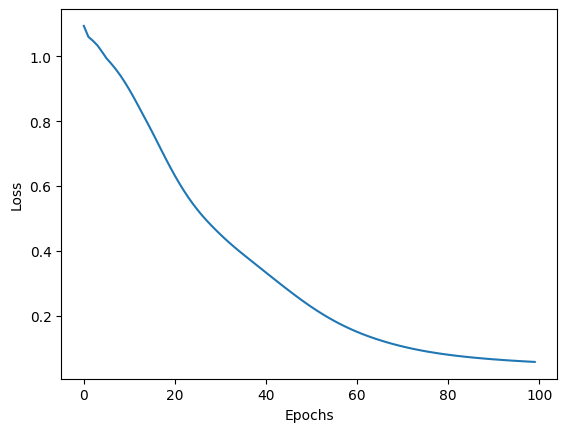

In [34]:
#plot graph of loss/error and the epochs
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')